# Sign Language Detection using ACTION RECOGNITION with Python

## 1) Importing the libraries

In [1]:
# %pip install --upgrade mediapipe

In [2]:
import cv2       #{access our webcam and extract our key points}  opencv -> comp vison lib that allows us to work with our webcam and makes it easier to build our feed 
# sklearn -> using for evaluaton metrics as well as to leverage a training and testing split 
import mediapipe as mp   #mp-> work with our key points(face,body); grab these points and save them as frames
from matplotlib import pyplot as plt       #helps in visualizing images easier'
import numpy as np          #help us in working with arrays and structuring our dataset 
import os         #help in working with file paths
import time     #help us in using sleep which will give some time b/w each frame to get into position

## 2) Keypoints using MP Holistic

In [3]:
# Holistic for downloading/leveraging our model
mp_holistic = mp.solutions.holistic         #holistic madel; make detections
# drawing utility -> easier to draw keypoints on our face
mp_drawing = mp.solutions.drawing_utils         #draw detections

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)        #color conversion;  BGR -> RGB
    image.flags.writeable = False        #image is no longer writeable
    results = model.process(image)         #detecting our image
    image.flags.writeable = True        #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)        #color conversion;  RGB -> BGR
    return image, results
      

In [5]:
def draw_landmarks(image, results):
 mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
 mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
 mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
 mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [25]:
# make sure we can access our webcam using opencv and apply secondary layer where we will make detection using mp
# setting up video capture and then looping thru every single frame and render that to screen
cap = cv2.VideoCapture(0)                #accessing our webcam and saving to it to cap so we can read the feed from webcam
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:  #if confidence scores for detected parts are less than this value they wont be considered
    while cap.isOpened():              #loop thru all frames in our camera;verifying that we are still accessing our webcam;
        # read frame
        ret, frame = cap.read()     #read the frame; happeing very fast so stacked together it will look like a video
    
        # make detection
        image, results = mediapipe_detection(frame, holistic)

        # draw landmarks
        draw_styled_landmarks(image, results)
        
        # showing to screen
        cv2.imshow('OpenCV Feed', image)     #;opencv -> specifying what our frame should be named;
          
        # breaking gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):        #waiting for key to press; 0x.. -> current key , pressed is q
          break 

cap.release()         #release our webcam
cv2.destroyAllWindows()           #close down our frame


In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
# frame           last frame

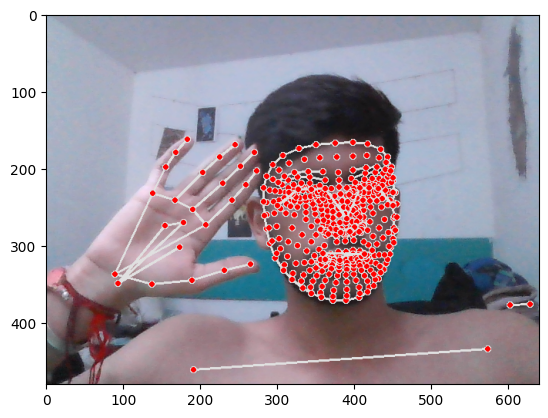

In [10]:
draw_landmarks(frame, results)        #func does not return img but applies visualizations to current image
# mp_holistic.FACEMESH_TESSELATION
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3) Extracting Keypoint Values

In [11]:
results.pose_landmarks.landmark[0]

x: 0.6097134947776794
y: 0.5531800389289856
z: -1.7565819025039673
visibility: 0.9998427629470825

In [12]:
all_landmarks = []       #one array(placeholder array) for all landmarks
for res in results.pose_landmarks.landmark:        #looping thru each landmark
    test = np.array([res.x, res.y, res.z, res.visibility])           #adding in array
    all_landmarks.append(test)

In [13]:
len(all_landmarks)
# results.left_hand_landmarks.landmark[0]

33

In [14]:
#refactoring above code in a singe line
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)       #if we hv results run prev line else run else;if there are no landmarks then return blank arr of same shape 
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
len(pose)

132

In [16]:
len(results.face_landmarks.landmark)*3     #coz each landmark has 3 values

1404

In [17]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)       #if we hv results run prev line else run else;if there are no landmarks then return blank arr of same shape 
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
extract_keypoints(results).shape

(1662,)

In [20]:
468*3+33*4+21*3+21*3

1662

## 4) Setting Up Folders for Collection

In [23]:
# path for exported arr(numpy arr)
DATA_PATH = os.path.join('MP_Data')

# actions that we try to detect
actions = np.array(['hello','paet','cool'])

#using 30 frames, preceeding key points that will be classified as an action 
# 30 videos worth of data for a action
no_sequence = 30  
# videos are going to be 30 frames in len
sequence_length = 30

#hello
## 0 (data worth 30 frames (arr))
## 1 ....
## 29
#paet

#cool


In [24]:
for action in actions:
    for sequence in range(no_sequence):
        try:
           os.makedirs(os.path.join(DATA_PATH, action ,str(sequence)))   #make sub directories as well 
        except:
            pass

## 5) Collecting KEypoints Values for Training & Testing

In [ ]:
# cap = cv2.VideoCapture(0)            
# #set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:  #if confidence scores for detected parts are less than this value they wont be considered
    
#     # loop thru actions
#     for action in actions:
#         # loop thru sequence/videos 
#         for sequence in range(no_sequence):
#         #    loop thru frame/video len
#            for frame_num in range(sequence_length):
       
#             # read frame
#             ret, frame = cap.read()     #read the frame; happeing very fast so stacked together it will look like a video
        
#             # make detection
#             image, results = mediapipe_detection(frame, holistic)

#             # draw landmarks
#             draw_styled_landmarks(image, results)
            
#             # showing to screen
#             cv2.imshow('OpenCV Feed', image)     #;opencv -> specifying what our frame should be named;
            
#             # breaking gracefully
#             if cv2.waitKey(10) & 0xFF == ord('q'):        #waiting for key to press; 0x.. -> current key , pressed is q
#              break 

# cap.release()         #release our webcam
# cv2.destroyAllWindows()           #close down our frame
